## Exp-3:Linear Regression: Parameter Estimation using OLS, MLE, and Gradient Descent.
## Name:Jhoshua Coutinho 
## Class: SE AIML  Roll No.11

## LR using OLS

In [47]:
# Step 1: imports
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
# Step 2: Input data
x = np.array([1,2,3]).reshape(-1,1)
y = np.array([2,3,5])

In [49]:
# Step 3: Create model and fit data
model = LinearRegression()
model.fit(x,y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [50]:
# Step 4: Get the coefficients and print
w = model.coef_[0]
b = model.intercept_
print(f"The slope is:{w} ")
print(f"The intercept is:{b}")

The slope is:1.4999999999999998 
The intercept is:0.3333333333333339


In [51]:
# Step 5: Make Predictions
y_pred = model.predict(x)
print("\nPredictions for training data")
for xi, yi, ypi in zip(x.flatten(), y, y_pred):
    print(f"x = {xi}, Actual y = {yi}, Predicted y = {ypi}")


Predictions for training data
x = 1, Actual y = 2, Predicted y = 1.8333333333333337
x = 2, Actual y = 3, Predicted y = 3.3333333333333335
x = 3, Actual y = 5, Predicted y = 4.833333333333333


In [52]:
# Step 6: Error Calculate
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error is: {mse}")
print(f"R2 Score is:{r2}")

Mean Squared Error is: 0.05555555555555558
R2 Score is:0.9642857142857143


## LR using MLE

In [53]:
# Step 1: imports
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import minimize

In [54]:
# Step 2: Input data
x = np.array([1,2,3])
y = np.array([2,3,5])

In [55]:
# Step 3: Negative log likelihood function
def neg_log_likelihood(params):
    w, b = params
    sigma_squared = 1 # assume variance = 1
    y_pred = w*x + b
    nll = 0.5*np.sum((y-y_pred)**2/sigma_squared)
    return nll

In [56]:
# initial value for w and b
initial_guess = [0,0]

In [57]:
# Step 4: minimize nll
result = minimize(neg_log_likelihood, initial_guess)
w_mle, b_mle = result.x
print(f"Slope is: {w_mle}")
print(f"Intercept is: {b_mle}")

Slope is: 1.5000000042671844
Intercept is: 0.3333333912814873


In [58]:
# Step 5: Prediction
y_pred = w_mle * x + b_mle
print("\nPredictions for training data")
for xi, yi, ypi in zip(x.flatten(), y, y_pred):
    print(f"x = {xi}, Actual y = {yi}, Predicted y = {ypi}")


Predictions for training data
x = 1, Actual y = 2, Predicted y = 1.8333333955486717
x = 2, Actual y = 3, Predicted y = 3.333333399815856
x = 3, Actual y = 5, Predicted y = 4.8333334040830405


In [59]:
# Step 6: Error Calculate
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error is: {mse}")
print(f"R2 Score is:{r2}")

Mean Squared Error is: 0.055555555555559986
R2 Score is:0.9642857142857114


# Recitation

In [60]:
# Step 1: imports
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [61]:
# Step 2: Input data
x = np.array([10,20,30,50]).reshape(-1,1)
y = np.array([12,21,29,48])

In [62]:
# Step 3: Create model and fit data
model = LinearRegression()
model.fit(x,y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [63]:
# Step 4: Get the coefficients and print
w = model.coef_[0]
b = model.intercept_
print(f"The slope is:{w} ")
print(f"The intercept is:{b}")

The slope is:0.8971428571428574 
The intercept is:2.828571428571422


In [64]:
# Step 5: Make Predictions
y_pred = model.predict(x)
print("\nPredictions for training data")
for xi, yi, ypi in zip(x.flatten(), y, y_pred):
    print(f"x = {xi}, Actual y = {yi}, Predicted y = {ypi}")


Predictions for training data
x = 10, Actual y = 12, Predicted y = 11.799999999999995
x = 20, Actual y = 21, Predicted y = 20.77142857142857
x = 30, Actual y = 29, Predicted y = 29.742857142857144
x = 50, Actual y = 48, Predicted y = 47.68571428571429


In [65]:
# Step 6: Error Calculate
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error is: {mse}")
print(f"R2 Score is:{r2}")

Mean Squared Error is: 0.1857142857142861
R2 Score is:0.9989463019250253


# Linear Regression using Gradient Descent

In [66]:
# Step 1: imports
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [67]:
# Step 2: Input data
x = np.array([1,2,3]).reshape(-1,1)
y = np.array([2,3,5])

In [85]:
# Step 3: 
w, b=0,0
alpha = 0.001
n_iter = 150000
n = len(x)

In [86]:
for i in range(n_iter):
    y_pred = w * x.flatten() + b
    dw = (-2/n)*np.sum(x.flatten()*(y-y_pred))
    db = (-2/n)*np.sum(y-y_pred)
    w = w - alpha * dw
    b = b - alpha * db
print(f"Slope is: {w}")    
print(f"Bias is: {b}")

Slope is: 1.4999999999998757
Bias is: 0.33333333333359577


# LR using GD with single parameter

In [87]:
import numpy as np
import matplotlib.pyplot as plt


In [88]:
# Step 2: Input data
x = np.array([1,2,3])
y = np.array([2,3,5])
n=len(x)

In [89]:
# Step 3: Calculate loss function
def loss(w1):
    w0 = np.mean(y) - w1*np.mean(x)
    y_pred = w1 * x + w0
    return np.sum((y-y_pred)**2)

In [90]:
# Step 4: Calculate Gradient of J with respect to w1
def gradient(w1):
    w0 = np.mean(y) - w1*np.mean(x)
    y_pred = w1 * x + w0
    return (-2/n)*np.sum(x * (y-y_pred))

In [93]:
# Step 5: Gradient Descent Algorithm
lr = 0.1
w1 = 4
iter = 15
w1_values=[]
loss_values=[]

for i in range(iter):
    w1_values.append(w1)
    loss_values.append(loss(w1))
    grad = gradient(w1)
    w1  -= lr * grad
    

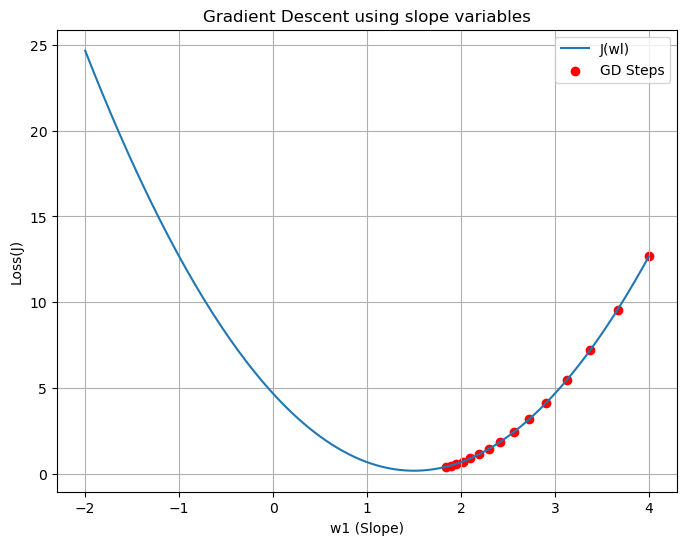

In [96]:
# Step 6: plot loss function and GD
w_space = np.linspace(-2, 4, 200)
loss_space = [loss(w) for w in w_space]

plt.figure(figsize =(8,6))
plt.plot(w_space, loss_space, label="J(wl)")
plt.scatter(w1_values, loss_values, color ="red", label="GD Steps")
plt.xlabel("w1 (Slope)")
plt.ylabel("Loss(J)")
plt.title("Gradient Descent using slope variables")
plt.legend()
plt.grid(True)
plt.show()